$\newcommand{\mtx}[1]{\boldsymbol{#1}}$

# Optimization and Root Finding

## Table of Contents
* [Nonlinear equations $f(x) = 0$](#nonlinear)
    * [Bisection](#bisection)
    * [Newton Raphson](#newton)
* [Finding the minimum (or maximum; $f'(x) = 0$)](#optimization)
    * [Bisection](#biopt)
    * [Gradient Descent](#grad)
    * [Newton](#newtonopt)

## Finding Roots of nonlinear equations<a class="anchor" id="nonlinear"></a>

Suppose we want to find the solution of 
$$
f(x) = 0,
$$
where $f$ is some arbitrary continuous (hopefully differentiable) function of $x$.  That is how do we find a root of this equation. Now of $f = Ax - b$ is a linear function, we know how to solve it:  $x_0 = A^{-1}b$. Likewise, if $f$ is a vector function $f=\vec{f} = \mtx{A}\vec{x} - \vec{b}$, then the solution is $x_0 = \mtx{A}^{-1}\vec{b}$, where $\mtx{A}^{-1}$ is the inverse matrix of $\mtx{A}$.  For arbitrary, nonlinear vector function $\vec{f}$, there are a number of techniques to solve for $\vec{f} = 0$, but for now we will focus on single variable functions, $f$.

To make these algorithms work, there are some constraints that must be put on $f$.  For instance, $f$ must be continuous and in some cases differentiable.  For instance, in the limiting case where $f$ is a random function that maps a real number to a random other real number, then the only algorithm is random guessing, which is computationally intractable.  So the key is that the function is at least continuous and even faster algorithms are possible if the function is differentiable. 

### Bisection Method<a class="anchor" id="bisection"></a>

The first method is quite simple.  Suppose we supply two values $a$ and $b$ such that we know that $f(a) < 0$ and $f(b) > 0$.  If $f$ is continuous then we know that there $\exists  x_0$ for $x_0 \in (a,b)$ such that $f(x_0) = 0$.  To find $x_0$, we will set $x_0 = (a+b)/2$ and compute $f(x_0)$.  If $f(x_0) > 0$ then set the next guess to be $x_0 = (x_0 + a)/2$ else we set $x_0 = (x_0 + b)/2$. Hence, we iterate by bisecting the interval to get closer and closer to the answer.  




In [2]:
import numpy as np
import matplotlib.pyplot as pl
import math

def bisection( func, a, b, NMAX=100, EPS=1e-7, TINY=1e-8) : 
  # 
  # func - function to bisect
  # a - lower bound for interval
  # b - upper bound for interval
  # NMAX - max number of iterations
  # eps - max error
  # TINY - minimum number 
  #
  # returns root, error, iterations or None, None, None if the interval is violated
  #

  x1, x2 = a, b
  y1, y2 = func(x1), func(x2)

  error = None
  if( y1*y2 > 0) :
    print("Bracketing error {0:8.4e} {1:8.4e}".format(y1,y2)) 
    return None, None, None

  for i in range(NMAX) : 
    x_mid = 0.5*(x1 + x2)
    y_mid = func(x_mid)

    if( y1*y_mid < 0) : 
      x2, y2 = x_mid, y_mid
    else :  
      x1, y1 = x_mid, y_mid
    
    error = math.fabs(x2-x1)/(0.5*(math.fabs(x1) + math.fabs(x2)+TINY)) #TINY prevents overflows around x1, x2=0
    if( error < EPS) : 
      return 0.5*(x1+x2), error, i+1
  
  print( "NMAX reached")
  return 0.5*(x1+x2), error, NMAX



2.0296788960695267 27 7.341634770896806e-08 4.4238971241838954e-07


As an example, lets find the root of 
$$
x^5 - 4x^3 - 1 = 0
$$ 
between -10 and 10.  Note that this just finds a root.  It will not find all the roots.  

In [4]:
def test_function( x) : 
  # simple test function
  return x**5 - 4*x**3 - 1

x0, err, iterations = bisection( test_function, -10, 10)
print( f"{x0} is a root and it took {iterations} iterations using bisection and the error is {err}")

2.0296788960695267 is a root and it took 27 iteration and the error is 7.341634770896806e-08


In the code listing above the constant epsilon is defined at the maximum allowable relative error in the root that is bracketed between x1 and x2 or 
$$
{\rm Err} = \frac{|x2 - x1}{0.5(|x1| + |x2|)} < {\rm epsilon}
$$

Now how fast does the bisection method converge toward the correct answer?  If we know that the root is somewhere between the interval $(a,b)$ then on every iteration, we will, at worst, halve that interval.  So between the $i$th and $i+1$th iteration, we reduce the error by 
$$
{\rm Err}_{i+1} \approx \frac{{\rm Err}_i}{2}
$$
or
$$
{\rm Err}_{i+1} \approx {\rm Constant} \times {\rm Err}_i^n \rightarrow n=1
$$
So this implies that in the worst case, the error is reduced linearly ($n=1$) on every iteration. Other methods to reduce the error faster exists ($n=2$), but these are generally less robust, but in many cases, they are worth the trade-off.  So bisection is a good method to have as a backup in case more sophisticated methods fail.


### Newton-Raphson Method<a class="anchor" id="newton"></a>

The second method that we will discuss is he Newton-Raphson method.  It converges quite a bit quicker than the bisection method, but it requires that $f$ and $f'$ be evaluated at every point $x$.  That is, we need both the function and its derivative. That being said, it is the fundamental root finding algorithm that nearly every optimization method either is inspired by or uses.  Suppose we have at a point $x$ and want to estimate where the root might be.  Let us do a Taylor expansion around $x$.  
$$
f(x+\delta) = f(x) + f'(x)\delta + O(\delta^2)
$$
So if we drop term higher than $\delta^2$, then the equation that we need to satisfy is
$$
f(x_0) = 0 = f(x) + f'(x)\delta \rightarrow \delta = -\frac{f(x)}{f'(x)}
$$
So starting out with some guess $x0$, we refine out estimate by the next step via
$$
x0 = x0 - \frac{f(x0)}{f'(x0)}
$$
So that is it.  For the homework, you will write a Newton-Raphson method.  To help you along, we have a template for you.  



In [5]:
def compute_derivative( func, x, deriv=None, h=1e-4, TINY=1e-8) :
  if( deriv is None) : 
    delta = h*math.fabs(x) + TINY 
    dfdx = (func(x+delta) - func(x-delta))/(2*delta)
  else :  
    dfdx = deriv(x)
  return dfdx
  
def newton_raphson( func, guess, deriv=None, NMAX=100, EPS=1e-7, TINY=1e-8) : 
  # 
  # func - function to find root
  # guess - initial guess
  # deriv - derivative function or None if using numerical derivative
  # NMAX - max number of iterations
  # eps - max error
  # TINY - minimum number 
  #
  # returns root, error, iteration or None, None, None if the interval is violated
  #
  pass

def test_deriv(x) : 
  return 5*x**4 - 12*x**2 


Note that we have a function called compute_derivative.  This allows us to either include a function that computes the derivative, e.g., test_deriv.  For the example above, we are still working with the equation
$$
f(x) = x^5 - 4x^3 - 1 = 0
$$
for which the derivative is 
$$
f'(x) = 5x^4 - 12x^2 
$$
which is implemented in the function test_deriv

In [ ]:
x0, err, iterations = newton_raphson( test_function, 1, deriv=test_deriv)
print( f"{x0} is a root and it took {iterations} iterations using newton raphson and the error is {err}")


It test_deriv is not given, you must compute the numerical derivative, which is just defined as 
$$
f'(x) \approx \frac{f(x+\delta) - f(x-\delta)}{2\delta}.
$$
An alert reader might notice that this is different from what is presented in calculus textbooks where 
$$
f'(x) =\lim_{\delta \rightarrow 0} \frac{f(x+\delta) - f(x)}{\delta}.
$$
The difference is that the central difference, which is what we are doing, is generally more accurate for finite $\delta$ than the one-side definition -- though there is a place for both as we will eventually see.  

Finally, lets estimate the convergence rate of this method.  Consider that $x_0$ is a root and we at a value $x_i$ at the $i$ iteration.  We Taylor expand to second order to find  
$$
f(x_0) = 0 \approx f(x_i) + f'(x_i)(x_0-x_i) + \frac 1 2 f''(x_i) (x_0-x_i)^2.
$$
Dividing by $f'(x_i)$, we have
$$
0 \approx -\delta + (x_0-x_i) + \frac 1 2 f''(x_i) (x_0 - x_i)^2.
$$
Rearranging terms, we have 
$$
0 \approx (x_0-x_{i+1}) + \frac 1 2 f''(x_i) (x_0 - x_i)^2.
$$
The term $x_0-x_{i+1}$ and $x_0-x_{i}$ are the errors of the $i+1$th and $i$th step, respectively.  Or in other words:
$$
{\rm Err}_{i+1} \approx {\rm Constant}\times {\rm Err}_i^2.
$$
So the error shrinks quadratrically.  You should notice that newton-raphson requires fewer evaluations to get a good error compared to bisection.



## Optimization - Finding the minimum (or maximum)<a class="anchor" id="optimization"></a>

Suppose we want to find the minimum of 
$$
f(x),
$$
where $f$ is some arbitrary continuous (hopefully differentiable) function of $x$. 

### Bisection Method <a class="anchor" id="biopt"></a>
The first method we will discuss is an extension of the bisection methods discussed previously.  Suppose we supply two values $x_1$ and $x_3$ such that we can define:
$$
x_1 < x_2 = \frac{x_1+x_3} 2 < x_3
$$  
and $f(x_2) < f(x_1)$ and $f(x_2) < f(x_3)$.  Now define $x_{1.5} = (x_1+x_2)/2$ and $x_{2.5} = (x_2+x_3)/2$.  The algorithm is as follows.

If $f(x_{1.5}) < f(x_2)$ then the new three points are $(x_1,x_2,x_3) = (x_1,x_{1.5},x_2)$.  If  $f(x_{2.5}) < f(x_2)$, then the new three points are $(x_1,x_2,x_3) = (x_2,x_{2.5},x_3)$.  Otherwise choose the middle three points $(x_1,x_2,x_3) = (x_{1.5},x_{2},x_{2.5})$.


Minimum at 3.0000000074505806 took 30 iteration using bisection with error 6.208817138335398e-09


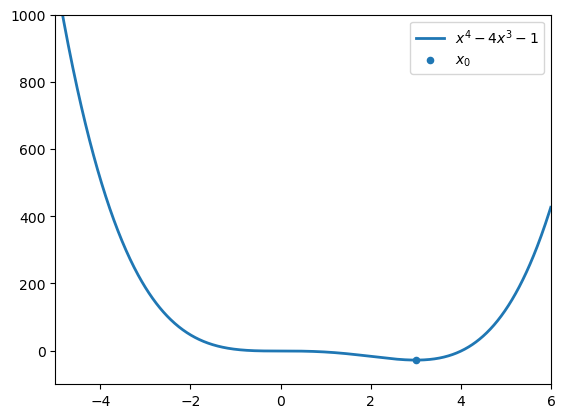

In [10]:
def bisection( func, a, b, NMAX=100, EPS=1e-8, TINY=1e-8) : 
  # 
  # func - function to bisect
  # a - lower bound for interval
  # b - upper bound for interval
  # NMAX - max number of iterations
  # eps - max error
  # TINY - minimum number 
  #
  # returns minimum, error, iterations or None, None, None if the interval is violated
  #

  x1, x3 = a, b
  x2 = 0.5*(x1+x3)
  y1, y2, y3 = func(x1), func(x2), func(x3)

  #Ensure initial conditions are satisfied.
  if( not (y2 < y1 and y2 < y3)) : 
    print( "Error in input")
    return None, None, None

  error = None

  for i in range(NMAX) : 
    x2 = 0.5*(x1+x3)
    x1_5 = 0.5*(x1 + x2)
    x2_5 = 0.5*(x2 + x3)
    y1, y1_5, y2, y2_5, y3 = func(x1), func(x1_5), func(x2), func(x2_5), func(x3)

    if( y1_5 < y2) : 
      x1, x3 = x1, x2 
    elif( y2_5 < y2) :  
      x1, x3 = x2, x3
    else :  
      x1, x3 = x1_5, x2_5
    
    error = math.fabs(x3-x1)/(0.5*(math.fabs(x1) + math.fabs(x3)+TINY)) #TINY prevents overflows around x1, x2=0
    if( error < EPS) : 
      return 0.5*(x1+x3), error, i+1
  
  print( "NMAX reached")
  return 0.5*(x1+x3), error, NMAX

def test_function( x) : 
  # simple test function
  return x**4 - 4*x**3 - 1

pl.clf()
x = np.arange(-5,6,0.01)
pl.plot( x, test_function(x), lw=2, label="$x^4 - 4x^3 - 1$")
x0, err, iterations = bisection( test_function, -10, 10)
pl.scatter( [x0], [test_function(x0)], s=20,label="$x_0$")
pl.legend(loc="best")
pl.xlim(-5,6)
pl.ylim(-100,1000)
print( f"Minimum at {x0} took {iterations} iteration using bisection with error {err}")

### Gradient Descent<a class="anchor" id="grad"></a>

The second method will build upon what we previously discussed for Newton-Raphson.  The idea is pretty simple.  Just as bisection for root-finding can be modified for optimization, we modify Newton-Raphson for optimization as well.  Let consider how we would do this.  Pictorially, the way Newton-Raphson works is by going down following the local gradient toward a root.  To make it work for minimization, we merely need to follow it all the way down in the negative direction.  That is at any point $x_i$, we must selected the next step such that 
$$
x_{i+1} = x_i + h,
$$
where $h \propto -f'(x_i)^{-1}$.  So if $f'(x_i)$ is positive, we go in the negative direction and vice versa.  Note that I have used the $\propto$.  We must think of a way to estimate the constant.  To do so, lets do a Taylor expansion around both $x_i$ and $x_{i+1}$
$$
f(x_i + h) \approx f(x_i) + h f'(x_i)\\
f(x_{i+1} - h) \approx f(x_{i} + h ) - h f'(x_i+h)
$$
If $x_{i+1} = x_i + h$ is heading in the direction of a minimum then $|f'(x_i + h)| < |f'(x_i)|$.  This also means that:
$$
f(x_i + h) - f(x_i) &<& h f'(x_i) \\
f(x_i + h) - f(x_i) &>& h f'(x_i+h) \rightarrow h f'(x_i+h) < h f'(x_i)  
$$
So we want to take a step that is large enough to move as fast as possible toward the minimum, but not so fast that we overshoot it.  So define two constants $0< c_1, c_2 < 1$ such that  
$$
f(x_i + h) - f(x_i) &<& c_1h f'(x_i) \\
h f'(x_i+h) &<& c_2 h f'(x_i)  
$$ 
These conditions are known as the Wolfe conditions.  A typical recommendation is $c_1 = 10^{-4}$ and $c_2 = 0.9$. Now a wide variety of $h$'s are still possible, but one way of doing it could be.  If $h$ does not satisfy the Wolfe conditions, take a smaller values of $h$.  If it does satisfy the Wolfe conditions, try a larger step for the next iteration.  

Let see this implemented:

Minimum at 2.999999962095643 took 52 iteration using gradient descent with error 9.558292246669048e-09


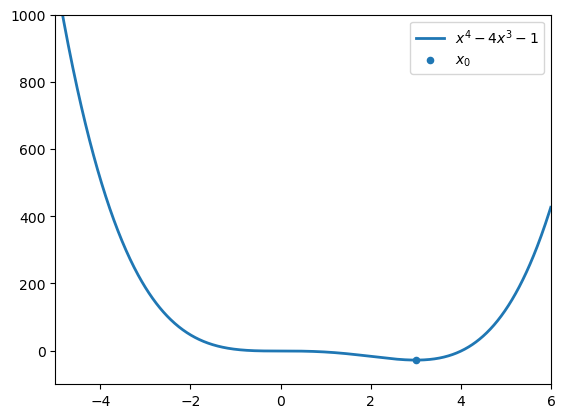

In [12]:
def compute_derivative( func, x, deriv=None, h=1e-4, TINY=1e-8) :
  if( deriv is None) : 
    delta = h*math.fabs(x) + TINY 
    dfdx = (func(x+delta) - func(x-delta))/(2*delta)
  else :  
    dfdx = deriv(x)
  return dfdx

def ok_wolfe(func, x0, h, deriv=None, c1 = 1e-4, c2 = 0.9) :
  dfdx = compute_derivative(func, x0, deriv=deriv)
  df1dx = compute_derivative(func, x0+h, deriv=deriv)
  condition1 = func(x0 + h) - func(x0) <= c1*h*dfdx
  condition2 = h*df1dx > c2*h*dfdx
  return condition1 and condition2

def gradient_descent( func, guess, deriv=None, NMAX=100, EPS=1e-8, TINY=1e-8) : 
  # 
  # func - function to minimize
  # guess
  # derivs - optional derivative function
  # NMAX - max number of iterations
  # EPS - max error
  # TINY - minimum number 
  #
  # returns minimum, error, iterations or None, None, None if the interval is violated
  #

  error = None
  x0 = guess
  h = 1e-1*math.fabs(x0) # initial guess for step size

  for i in range(NMAX) :
    dfdx = compute_derivative(func, x0, deriv=deriv)
    h = -np.sign(dfdx)*math.fabs(h)
    error = math.fabs(h/(math.fabs(x0) + TINY))    
    if( error < EPS) : 
      return x0, error, i+1

    if ok_wolfe(func, x0, h, deriv=deriv) : 
      x0 += h
      h *= 1.5 # increase the step size next time
    else :
      h*= 0.5
    
  print("NMAX reached")
  return x0, error, NMAX

x = np.arange(-5,6,0.01)
pl.plot( x, test_function(x), lw=2, label="$x^4 - 4x^3 - 1$")
x0, err, iterations = gradient_descent( test_function, 5)
pl.scatter( [x0], [test_function(x0)], s=20,label="$x_0$")
pl.legend(loc="best")
pl.xlim(-5,6)
pl.ylim(-100,1000)
print( f"Minimum at {x0} took {iterations} iteration using gradient descent with error {err}")


### Newton's Method<a class="anchor" id="newtonopt"></a>

The final single variable method that we will describe is Newton's method.  To derive it, we begin with a Taylor expansion.
$$
f(x+h) \approx f(x) + f'(x) h + \frac 1 2 f''(x)h^2
$$
Now the minimum is at $f'(x_0) = 0$ or $df(x+h)/dh = 0$.  Applying this to the Taylor expansion, we have
$$
\frac{df(x+h)}{dh} = 0 \approx f'(x) + f''(x)h \rightarrow h = -\frac{f'(x)}{f''(x)}.
$$

As an exercise, you will write a code to implement this.  The template is as follows:


In [ ]:
def compute_derivative( func, x, deriv=None, deriv2=None, h=1e-4, TINY=1e-8) :
  if( deriv is None) : 
    delta = h*math.fabs(x) + TINY 
    dfdx = (func(x+delta) - func(x-delta))/(2*delta)
  else :  
    dfdx = deriv(x)
  if( deriv2 is None) : 
    delta = h*math.fabs(x) + TINY 
    dfdx2 = (func(x+delta) + func(x-delta) - 2*func(x))/(delta*delta)
  else :  
    dfdx2 = deriv2(x)
  return dfdx, dfdx2

def newton( func, guess, deriv=None, deriv2=None, NMAX=100, EPS=1e-8, TINY=1e-8) : 
  # 
  # func - function to minimize
  # guess
  # deriv, deriv2 - optional derivative and second derivative functions
  # NMAX - max number of iterations
  # EPS - max error
  # TINY - minimum number 
  #
  # returns minimum, error, iterations or None, None, None if the interval is violated
  #
  pass

x = np.arange(-5,6,0.01)
pl.plot( x, test_function(x), lw=2, label="$x^4 - 4x^3 - 1$")
x0, err, iterations = newton( test_function, 5)
pl.scatter( [x0], [test_function(x0)], s=20,label="$x_0$")
pl.legend(loc="best")
pl.xlim(-5,6)
pl.ylim(-100,1000)
print( f"Minimum at {x0} took {iterations} iteration using newton's method with error {err}")
